In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import codecs
import os
import csv
from sklearn.tree import DecisionTreeClassifier
import datetime

Далее я меняю папку, в которой содержится файл. Обращаю внимание, что поменял название файла на train1.csv. При подгрузке файла использую кодировку "ср1251", разделитель - табуляция

In [5]:
cwd = os.getcwd()
cwd = os.chdir('C:\Users\User\Desktop\python')
users = pd.read_csv('train1.csv', header=0, sep='\t', encoding ='cp1251')

In [6]:
users[:5]  # проверка - верно ли все подгрузилось

,id,taxactionSystem,regdt,workerCount,fssdccount,pfrdcCount,fnsdcCount,hasCloudCryptCertificate,OrgCreationDate,documentsCount,cnt_users,is_prolong
0,101969,"УСН, Доходы 6%",1994-03-26,5.0,0.0,0.0,0.0,0,04.12.2014,2.0,0.0,1.0
1,108477,ОСНО,2012-12-05,1.0,0.0,0.0,0.0,0,22.09.2014,5.0,0.0,0.0
2,101476,"УСН, Доходы 6%",2009-11-15,1.0,3.0,3.0,2.0,0,05.04.2016,0.0,0.0,1.0
3,102579,"УСН, Доходы за вычетом расходов 15%",2015-08-09,1.0,0.0,0.0,0.0,0,24.09.2015,0.0,0.0,0.0
4,103110,"УСН, Доходы за вычетом расходов 15%",2015-03-29,0.0,0.0,0.0,0.0,0,03.04.2015,4.0,0.0,0.0


In [27]:
users.taxactionSystem[:5]
users.OrgCreationDate = users.OrgCreationDate.apply(pd.to_datetime) #преобразование object в datetime
#users.dtypes
users.info()
users.fillna('2015-01-01', inplace = True) # замена пустых значений на дату
#print users[:5]
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7626 entries, 0 to 7625
Data columns (total 12 columns):
id                          7626 non-null int64
taxactionSystem             7626 non-null object
regdt                       7604 non-null object
workerCount                 7626 non-null float64
fssdccount                  7626 non-null float64
pfrdcCount                  7626 non-null float64
fnsdcCount                  7626 non-null float64
hasCloudCryptCertificate    7626 non-null int64
OrgCreationDate             7626 non-null datetime64[ns]
documentsCount              7626 non-null float64
cnt_users                   7626 non-null float64
is_prolong                  7626 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(2)
memory usage: 655.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7626 entries, 0 to 7625
Data columns (total 12 columns):
id                          7626 non-null int64
taxactionSystem             7626 non-null object
regdt

Далее я для себя вывел все варианты написания системы налогообложения в колонке taxactionSystem. И посмотрел, какие основные категории с помощью matplotlib

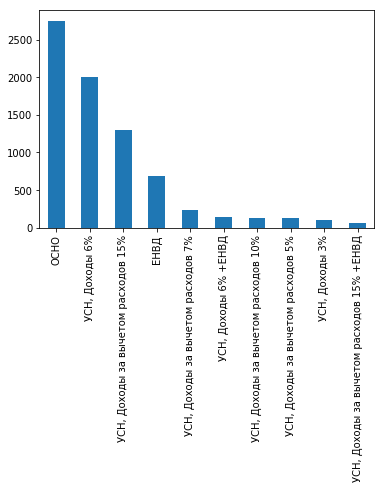

In [28]:
%matplotlib inline
#print users['taxactionSystem'].value_counts()
a = users['taxactionSystem'].value_counts()
a[:10].plot(kind='bar')

Далее я решил заменить системы налогообложения на значения от 1 до 5, где усн6% - 1, енвд - 2, усн15% - 3, осно - 5. Выбор был сделан на основе моего предположения о необходимх трудозатратах бухгалтера и требований к его квалификации. Чем сложнее процесс, тем больше цифра. 
Я бы заменил 4-мя строчками, если бы знал как написать нечто следующее и обязательно в этой последовательности
1) замена всех, в которых есть 'расход'
2) замена всех, в которых есть 'усн'
3) замена всех, в которых есть 'ЕНВД'
4) замена всех, в которых есть 'ОСНО'

In [30]:
b = users.replace(u'ОСНО', 5)
b = b.replace(u'УСН, Доходы 6%', 1)
b = b.replace(u'УСН, Доходы 6% +ЕНВД', 1)
b = b.replace(u'УСН, Доходы 3%', 1)
b = b.replace(u'УСН, Доходы 4%', 1)
b = b.replace(u'УСН, Доходы 3% +ЕНВД', 1)
b = b.replace(u'ЕНВД', 2)
b = b.replace(u'УСН, Доходы за вычетом расходов 15%', 3)
b = b.replace(u'УСН, Доходы за вычетом расходов 7%', 3)
b = b.replace(u'УСН, Доходы за вычетом расходов 10%', 3)
b = b.replace(u'УСН, Доходы за вычетом расходов 5%', 3)
b = b.replace(u'УСН, Доходы за вычетом расходов 15% +ЕНВД', 3)
b = b.replace(u'УСН, Доходы за вычетом расходов 7% +ЕНВД', 3)
b = b.replace(u'УСН, Доходы за вычетом расходов 12,5%', 3)
b = b.replace(u'УСН, Доходы за вычетом расходов 5% +ЕНВД', 3)
b = b.replace(u'УСН, Доходы за вычетом расходов 6%', 3)
b = b.replace(u'УСН, Доходы за вычетом расходов 12%', 3)
b = b.replace(u'УСН, Доходы за вычетом расходов 10% +ЕНВД', 3)
b = b.replace(u'УСН, Доходы за вычетом расходов 7,5%', 3)
b = b.replace(u'УСН, Доходы за вычетом расходов 12% +ЕНВД', 3) 
b = b.replace(u'УСН, Доходы за вычетом расходов 13%', 3)
b = b.replace(u'УСН, Доходы за вычетом расходов 12,5% +ЕНВД', 3)
b = b.replace(u'УСН, Доходы за вычетом расходов 9%', 3)
#b[:29]

Далее я заменяю даты на количество дней от сегодня() до указанной в ячейке. Таким образом у меня получается измеряемый параметр, который может быть интерпретирован при обучении. Я предположил: 1) что чем меньше времени существует компания, тем больше вероятность, что она мобильна и может отказаться от услуг СКБ контур, соответственно, чем старше, тем она более закостенелая, и ей сложно отменить ранее принятое решение, пройдя несколько согласований, в том числе генерального директора. 2) что чем меньше времени регистрации в системе СКБ Контур, тем больше шансов, что последует отказ. Это связано с тем, что не успевают распробовать, возможно не увидят реальной выгоды. Повторюсь, это мои предположения.

In [31]:
b.head()

,id,taxactionSystem,regdt,workerCount,fssdccount,pfrdcCount,fnsdcCount,hasCloudCryptCertificate,OrgCreationDate,documentsCount,cnt_users,is_prolong
0,101969,1,1994-03-26,5.0,0.0,0.0,0.0,0,2014-04-12,2.0,0.0,1.0
1,108477,5,2012-12-05,1.0,0.0,0.0,0.0,0,2014-09-22,5.0,0.0,0.0
2,101476,1,2009-11-15,1.0,3.0,3.0,2.0,0,2016-05-04,0.0,0.0,1.0
3,102579,3,2015-08-09,1.0,0.0,0.0,0.0,0,2015-09-24,0.0,0.0,0.0
4,103110,3,2015-03-29,0.0,0.0,0.0,0.0,0,2015-03-04,4.0,0.0,0.0


In [32]:
b.corr()

,id,taxactionSystem,workerCount,fssdccount,pfrdcCount,fnsdcCount,hasCloudCryptCertificate,documentsCount,cnt_users,is_prolong
id,1.000000,0.010756,-0.001004,-0.017101,-0.016469,-0.018954,-0.007336,-0.019286,-0.013948,-0.014134
taxactionSystem,0.010756,1.000000,-0.108740,-0.013086,-0.075480,0.174621,-0.003311,-0.037882,0.024585,-0.087940
workerCount,-0.001004,-0.108740,1.000000,0.185827,0.238348,0.027925,-0.094538,0.160805,0.050974,0.256153
fssdccount,-0.017101,-0.013086,0.185827,1.000000,0.788965,0.743764,0.455691,0.320929,0.174457,0.356721
pfrdcCount,-0.016469,-0.075480,0.238348,0.788965,1.000000,0.660638,0.386241,0.293190,0.149861,0.311941
fnsdcCount,-0.018954,0.174621,0.027925,0.743764,0.660638,1.000000,0.577331,0.367311,0.191766,0.350731
hasCloudCryptCertificate,-0.007336,-0.003311,-0.094538,0.455691,0.386241,0.577331,1.000000,0.283826,0.166902,0.389894
documentsCount,-0.019286,-0.037882,0.160805,0.320929,0.293190,0.367311,0.283826,1.000000,0.238247,0.351802
cnt_users,-0.013948,0.024585,0.050974,0.174457,0.149861,0.191766,0.166902,0.238247,1.000000,0.140143
is_prolong,-0.014134,-0.087940,0.256153,0.356721,0.311941,0.350731,0.389894,0.351802,0.140143,1.000000


## Для продолжения тестового задания - принял решение убрать колонки с датами из dataframe

In [13]:
result = users['is_prolong'] #Вы борка "учителя" - итоговые значения
b = b.drop(['id','regdt', 'is_prolong'], axis = 1) #исключение "ненужных" столбцов с информацией
print b[:1]
print result[:1]
clf = DecisionTreeClassifier(random_state=241) # почему именно 241 - не разобрался еще, значение взял из лекции
clf.fit(b, result)

   taxactionSystem  workerCount  fssdccount  pfrdcCount  fnsdcCount  \
0                1          5.0         0.0         0.0         0.0   

   hasCloudCryptCertificate OrgCreationDate  documentsCount  cnt_users  
0                         0      2014-04-12             2.0        0.0  
0    1.0
Name: is_prolong, dtype: float64


TypeError: float() argument must be a string or a number

In [40]:
importances = clf.feature_importances_
print 'Вес показателя - система налогообложения     = ', importances[0]
print 'Вес показателя - количество трудящихся       = ', importances[1]
print 'Вес показателя - количество отчетов в ФСС    = ', importances[2]
print 'Вес показателя - количество отчетов в ПФР    = ', importances[3]
print 'Вес показателя - количество отчетов в ФНС    = ', importances[4]
print 'Вес показателя - был ли облачный сертификат  = ', importances[5]
print 'Вес показателя - количество документов всего = ', importances[6]
print 'Вес показателя - количество пользователей    = ', importances[7]


Вес показателя - система налогообложения     =  0.08963612275
Вес показателя - количество трудящихся       =  0.189125024035
Вес показателя - количество отчетов в ФСС    =  0.0596039585585
Вес показателя - количество отчетов в ПФР    =  0.0694667958639
Вес показателя - количество отчетов в ФНС    =  0.11754622441
Вес показателя - был ли облачный сертификат  =  0.237286382249
Вес показателя - количество документов всего =  0.181718664304
Вес показателя - количество пользователей    =  0.0556168278299


В связи с тем, что дальше мои текущие знания заканчиваются, я закончу этот блокнот. Возможно позже смогу дорешать задачу, после получения необходимых знаний
Предполагаю, что далее необходимо значения из каждой строчки dataframe умножить на вектор-столбец importances, в результате получим число. Далее это число необходимо будет сравнить пороговым значением (которое я бы подобрал опытным путем) и проверить величину ошибки при этом пороге. Елси меньше 5%, пробовать на тестовой выборке, если больше - искать другое пороговое значение.

## Прошу не судить строго, я только учусь, и возможно к 15 января уже смогу решить эту задачу. Благодарю за внимание.